In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
os.chdir('..')
import manifold_methods
import plotting
import mappings
import data_loader

In [4]:
exp_path = '/lustre06/project/6065672/shared/DietNet/1KGB_POP24/1KGP/WGS30X_V1/oldnow/MattsPlace'
fname = '1000G.2504_WGS30x.GSA17k_MHI.intersectGSA.miss10perc.maf0.05.pruned.autosomes.noHLA.phased_imputed_V1.hdf5'

with h5py.File(os.path.join(exp_path, fname), 'r') as hf:
    #model_attrs = hf['gradients'][:]
    #print('loaded gradient of fc1 w.r.t. input from {}'.format(attr_fc1_saliency_name))
    inputs = hf['inputs'][:]
    class_label_names = hf['class_label_names'][:]
    class_labels = hf['class_labels'][:]
    samples = hf['samples'][:]
    snp_names = hf['snp_names'][:]
    
labels = data_loader.preprocess_labels_1000G(class_labels, 
                                             class_label_names)

Calculating optimal t...
  Automatically selected t = 26
Calculated optimal t in 1.80 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.24 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.69 seconds.
Calculating optimal t...
  Automatically selected t = 14
Calculated optimal t in 1.90 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.08 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.86 seconds.
Calculating optimal t...
  Automatically selected t = 22
Calculated optimal t in 1.76 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.23 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.71 seconds.
Calculating optimal t...
  Automatically selected t = 18
Calculated optimal t in 1.88 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.07 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.82 seconds.
Calculating optimal t...
  A

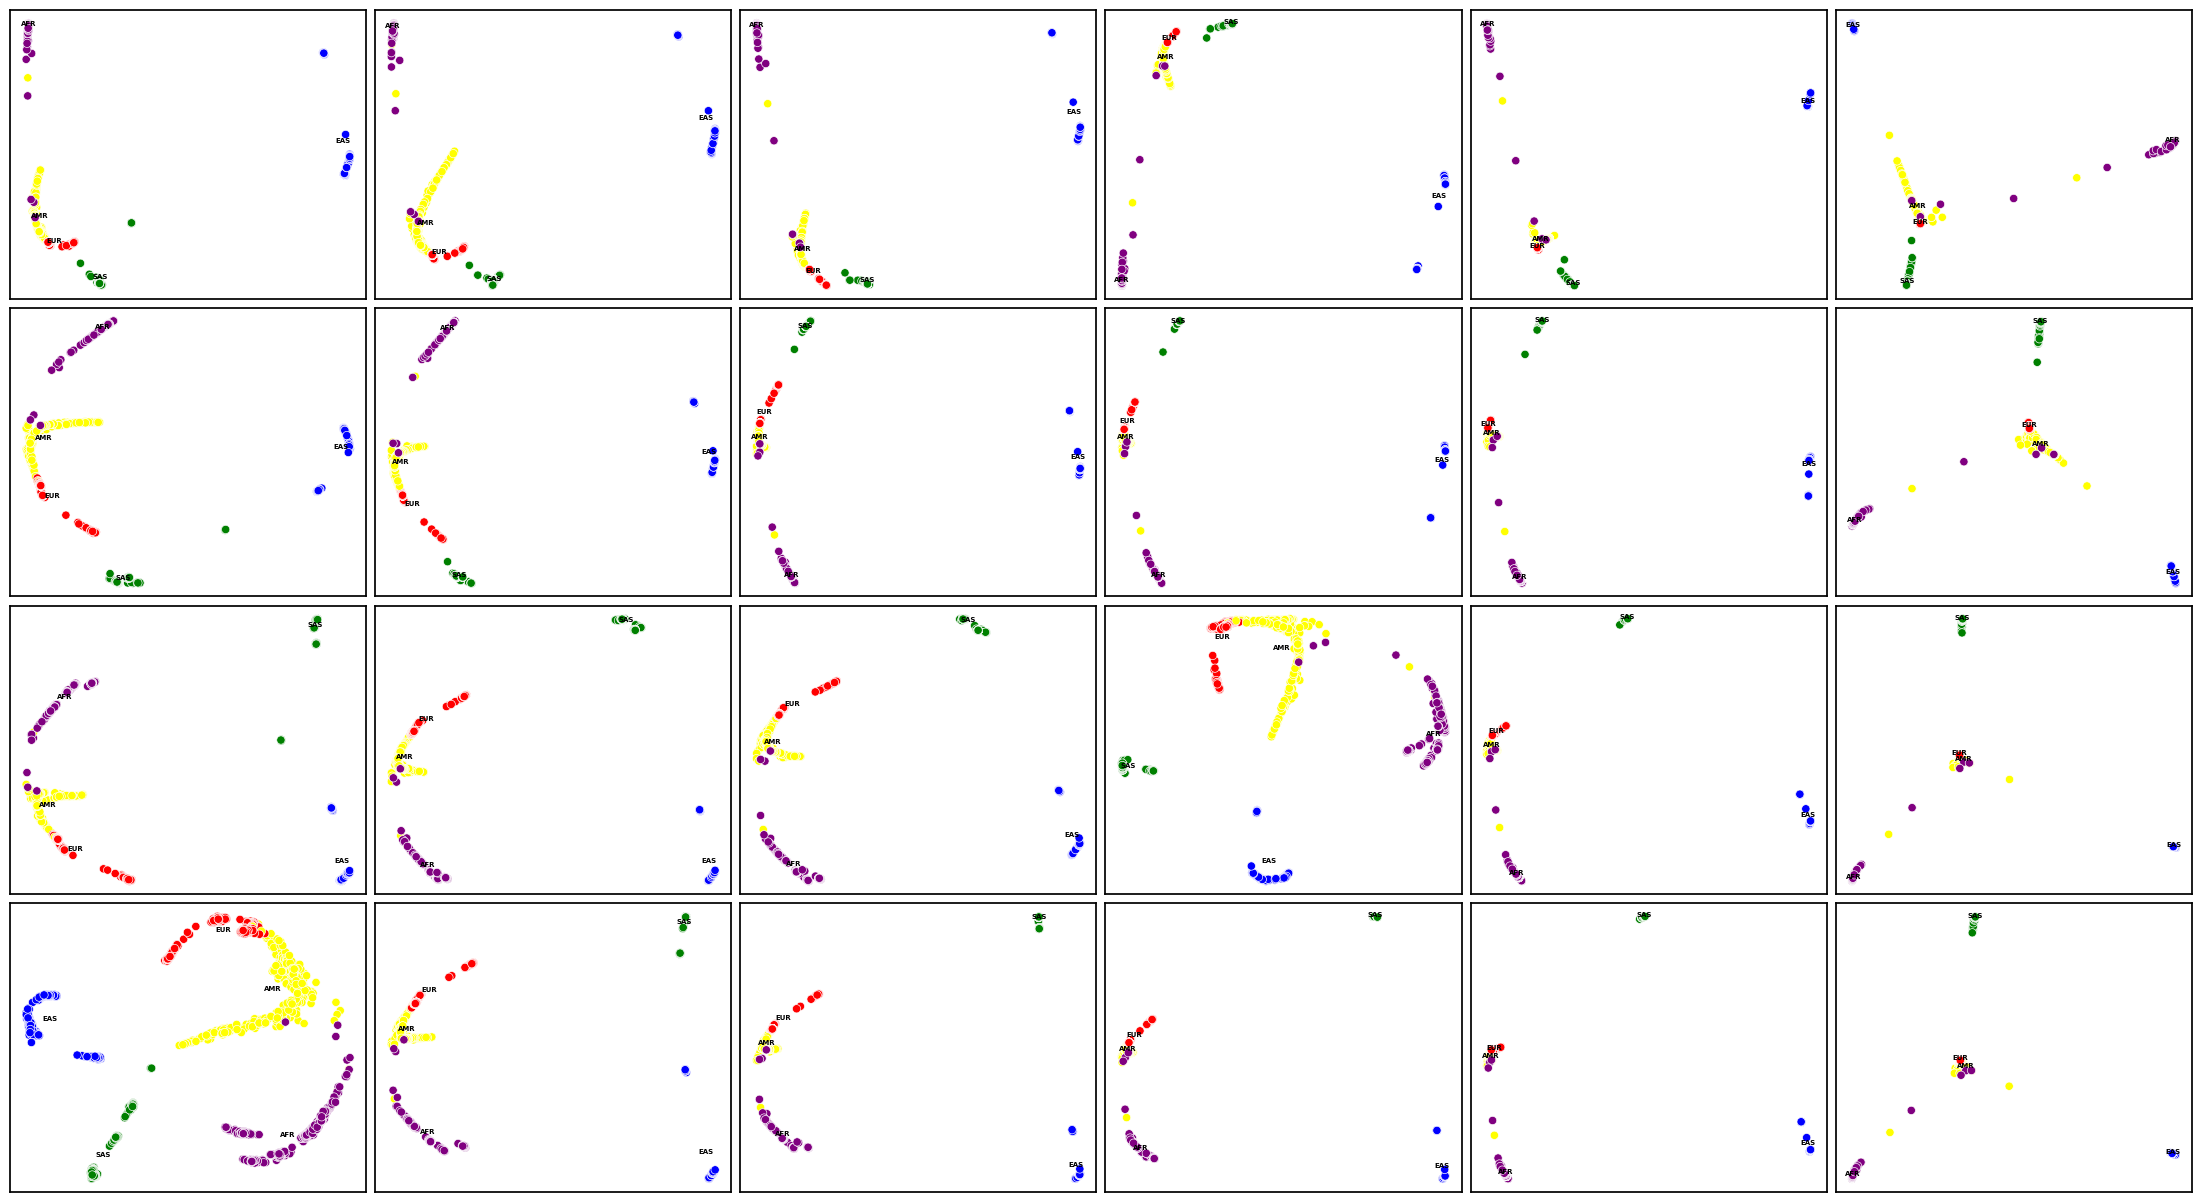

In [10]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(22,12))

decays=(10, 20, 40, 60)
knns=(5, 10, 20, 50, 100, 200)
gamma=1
label_positions=True
t='auto'

for i, decay in enumerate(decays):
    for j, knn in enumerate(knns):
        model_name, _ = plotting.generate_filenames(dataset_type='1000G',
                                                    manifold_algo='phate',
                                                    decay=decay, 
                                                    knn=knn, 
                                                    gamma=gamma, 
                                                    t=t,
                                                    label_positions=label_positions)
        model_path = os.path.join('models', model_name)
        algo, transformed_data = manifold_methods.perform_phate(inputs, 
                                                                model_path,
                                                                knn=knn, 
                                                                decay=decay,
                                                                gamma=gamma,
                                                                t=t)

        plotting.plot_embeddings(transformed_data, 
                                 labels[1], 
                                 '', 
                                 mappings.pop_pallette_1000G_coarse, 
                                 mappings.label_order_1000G_coarse,
                                 label_positions=True,
                                 ax=ax[i,j])

fig.tight_layout()

Calculating optimal t...
  Automatically selected t = 26
Calculated optimal t in 1.79 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.21 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.73 seconds.
Calculating optimal t...
  Automatically selected t = 14
Calculated optimal t in 1.85 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.07 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.83 seconds.
Calculating optimal t...
  Automatically selected t = 22
Calculated optimal t in 1.78 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.22 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.69 seconds.
Calculating optimal t...
  Automatically selected t = 18
Calculated optimal t in 1.87 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.05 seconds.
Calculating metric MDS...
Calculated metric MDS in 2.77 seconds.
Calculating optimal t...
  A

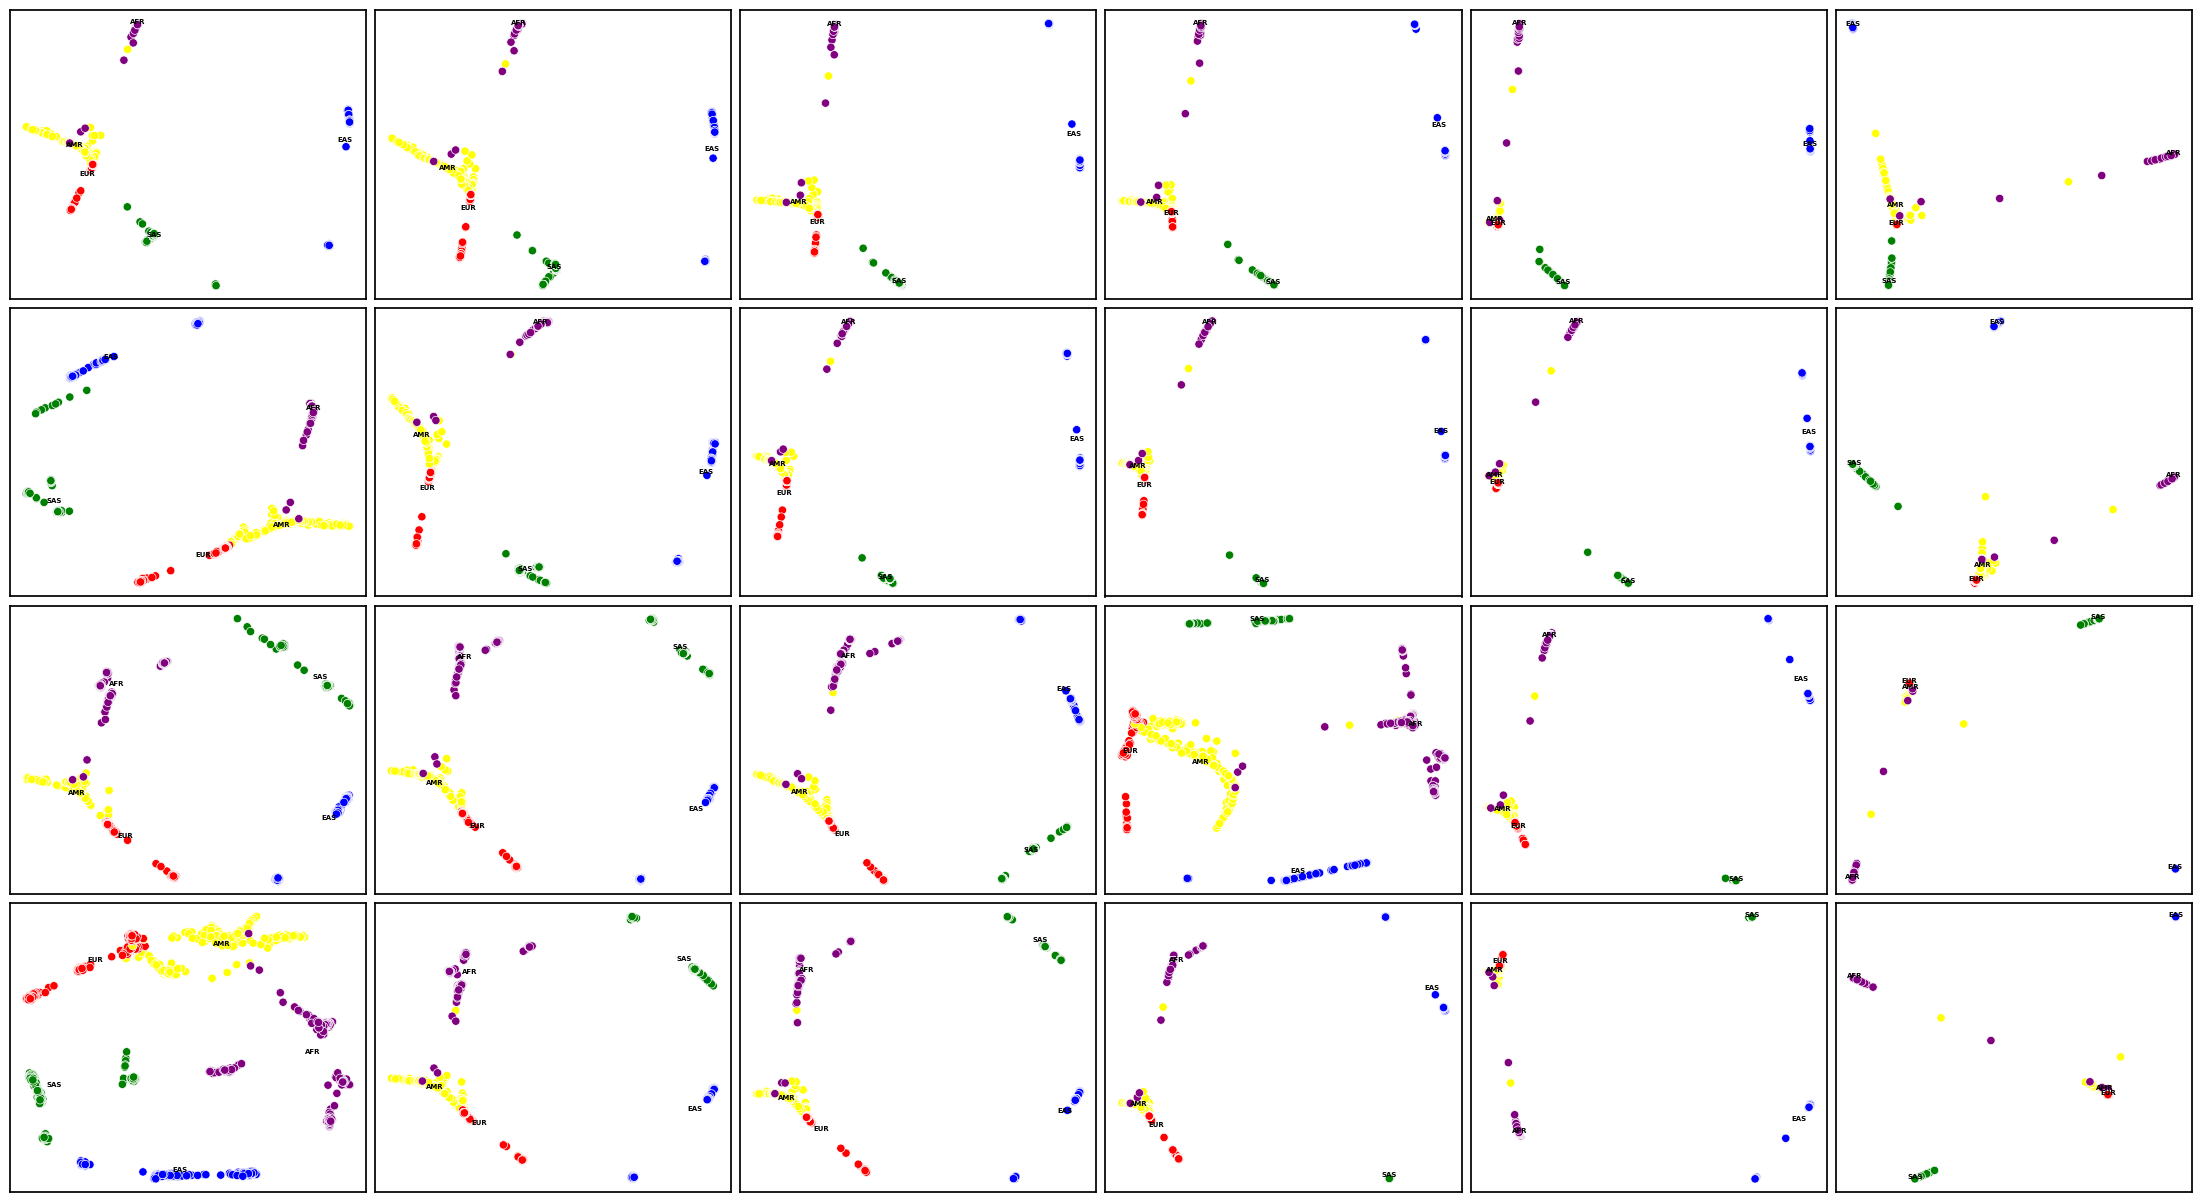

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(22,12))

decays=(10, 20, 40, 60)
knns=(5, 10, 20, 50, 100, 200)
gamma=0
label_positions=True
t='auto'

for i, decay in enumerate(decays):
    for j, knn in enumerate(knns):
        model_name, _ = plotting.generate_filenames(dataset_type='1000G',
                                                    manifold_algo='phate',
                                                    decay=decay, 
                                                    knn=knn, 
                                                    gamma=gamma, 
                                                    t=t,
                                                    label_positions=label_positions)
        model_path = os.path.join('models', model_name)
        algo, transformed_data = manifold_methods.perform_phate(inputs, 
                                                                model_path,
                                                                knn=knn, 
                                                                decay=decay,
                                                                gamma=gamma,
                                                                t=t)

        plotting.plot_embeddings(transformed_data, 
                                 labels[1], 
                                 '', 
                                 mappings.pop_pallette_1000G_coarse, 
                                 mappings.label_order_1000G_coarse,
                                 label_positions=True,
                                 ax=ax[i,j])

fig.tight_layout()